In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Simulation of relationship between Constant Velocity and Circular Cone Angle

In this simulation, we assume that the constant velocity during free-fall, denoted as \(v_c\), is inversely proportional to \(\sin^\alpha(\theta)\), where \(\theta\) is the circular cone angle, and \(\alpha\) is the exponent to be determined.

The mathematical relationship is given by:

$$
v_c \propto \frac{1}{\sin^\alpha(\theta)}
$$

Where:
- $v_c$ is the constant velocity during free-fall.
- $\theta$ is the circular cone angle.
- $\alpha$ is the parameter to be estimated through fitting.

We will simulate data and perform a fitting process to find the optimal value of $\alpha$ that best describes the relationship between $v_c$ and $\sin(\theta)$.


### Geometry of the Circular Cone and its Relationship

Let:
- $\beta$ be the angle of the sector used to form the circular cone.
- $r$ be the radius of the base of the circular cone.
- $a$ be the slant height of the cone.

We have the following relationship:

$$
2 \pi r = 2 \pi a \cdot \frac{\beta}{2 \pi}
$$

This implies:

$$
\frac{1}{\sin(\theta)} = \frac{2 \pi}{\beta}
$$


In [104]:
beta = np.array([1/3, 2/5, 1/2, 2/3, 5/6, 1, 5/3, 2]) * np.pi

$$
par = \frac{1}{sin(\theta)}
$$

In [105]:
par = (2*np.pi)/beta 

In [106]:
par

array([6. , 5. , 4. , 3. , 2.4, 2. , 1.2, 1. ])

In [107]:
times = np.array([0.21, 0.13*2, 0.15*2,1.73-1.41,2.81-2.44, 6.78-6.36,18.01-17.19,2.58-1.54])

In [108]:
times

array([0.21, 0.26, 0.3 , 0.32, 0.37, 0.42, 0.82, 1.04])

In [109]:
velocity = 1/ times

In [110]:
# Define the model function: v = C * p^alpha
def model(p, C, alpha):
    return C * p**alpha

# Fit the model to the data
params, covariance = curve_fit(model, par, velocity)

# Extract the best-fit C and alpha values
C_best, alpha_best = params

In [111]:
C_best, alpha_best = params

In [112]:
params

array([1.29057915, 0.71877493])

In [113]:
p_fit = np.linspace(min(par), max(par), 100)
v_fit = model(p_fit, C_best, alpha_best)

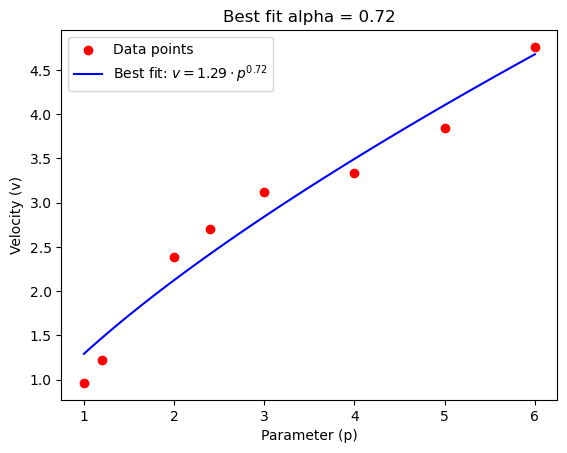

Best-fit C: 1.2905791474663406
Best-fit alpha: 0.7187749288966075


In [114]:
plt.scatter(par, velocity, color='red', label='Data points')
plt.plot(p_fit, v_fit, label=f'Best fit: $v = {C_best:.2f} \cdot p^{{{alpha_best:.2f}}}$', color='blue')
plt.xlabel('Parameter (p)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.title(f'Best fit alpha = {alpha_best:.2f}')
plt.show()

# Print the best-fit values of C and alpha
print(f"Best-fit C: {C_best}")
print(f"Best-fit alpha: {alpha_best}")